In [85]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
client = MongoClient()
db = client.test
results = db.results

In [9]:
results.count()

/home/jin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


7871

In [22]:
results.distinct('keywords')

['홍수', '지진', '태풍']

In [97]:
df = pd.DataFrame(columns=['days', 'count'], index=[i for i in range(len(dict_date))])

In [77]:
dict_date = {}
for i in results.find({'keywords':'지진'}):
    date = i['date'][:10]
    
    if date in dict_date:
        dict_date[date] += 1
    else:
        dict_date[date] = 1


2018-06-15
2018-06-15
2018-06-15
2018-06-15
2018-06-15
2018-06-15
2018-06-14
2018-06-13
2018-06-13
2018-06-13
2018-06-14
2018-06-14
2018-06-14
2018-06-13
2018-06-13
2018-06-09
2018-06-09
2018-06-09
2018-06-09
2018-06-09
2018-06-12
2018-06-12
2018-06-12
2018-06-12
2018-06-11
2018-06-05
2018-06-05
2018-06-05
2018-05-14
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-16
2018-06-07
2018-06-07
2018-06-07
2018-06-05
2018-06-05
2018-06-05
2018-06-05
2018-06-09
2018-05-09
2018-05-31
2018-06-12
2018-05-05
2018-06-07
2018-06-03
2018-06-03
2018-06-03
2018-06-03
2018-05-16
2018-05-16
2018-04-27
2018-04-27
2018-04-27
2018-04-27
2018-04-27
2018-06-08
2018-06-08
2018-06-08
2018-06-08
2018-06-08
2018-05-16
2018-05-16
2018-05-16
2018-05-16
2018-05-16
2018-05-31
2018-05-14
2018-05-14
2018-04-23
2018-04-23
2018-04-23
2018-06-10
2018-04-27
2018-05-12
2018-05-12
2018-05-12
2018-05-12
2018-05-16
2018-06-07
2018-06-07
2018-06-07
2018-06-05
2018-06-05
2018-06-05
2018-06-09
2018-05-09
2018-05-31

In [106]:
for i, key in enumerate(dict_date):
    df['days'][i] = datetime.strptime(key, '%Y-%m-%d') 
    df['count'][i] = dict_date.get(key)

In [114]:
df = df.sort_values(by=['days'])

In [115]:
days = df['days']
count = df['count']

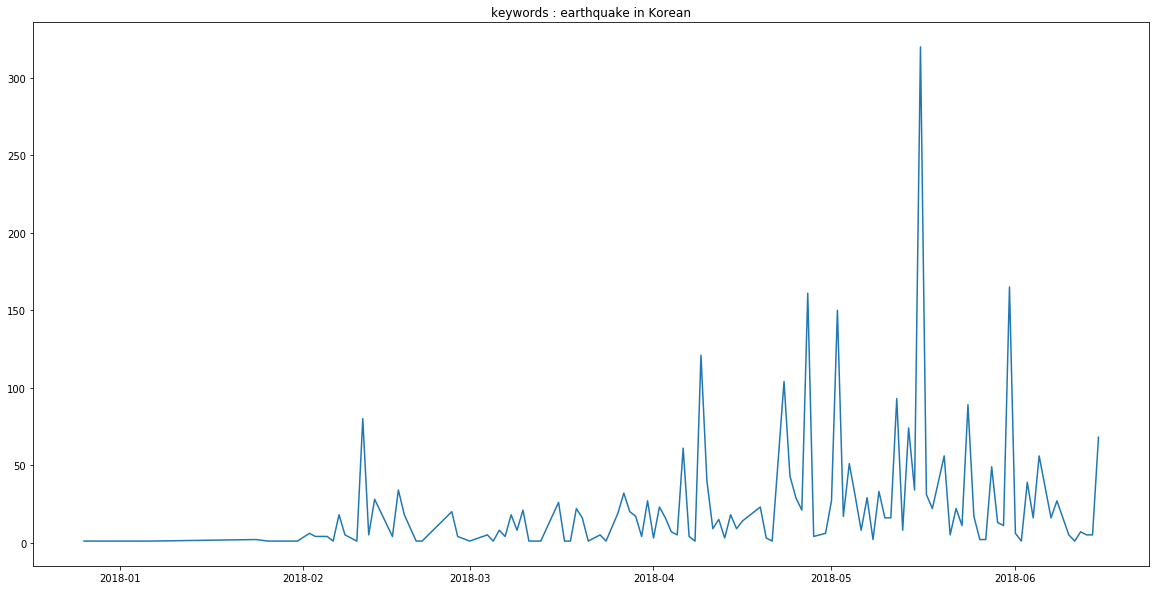

In [116]:
plt.figure(figsize=(20,10))
plt.title('keywords : earthquake in Korean')
line = plt.plot(days, count)

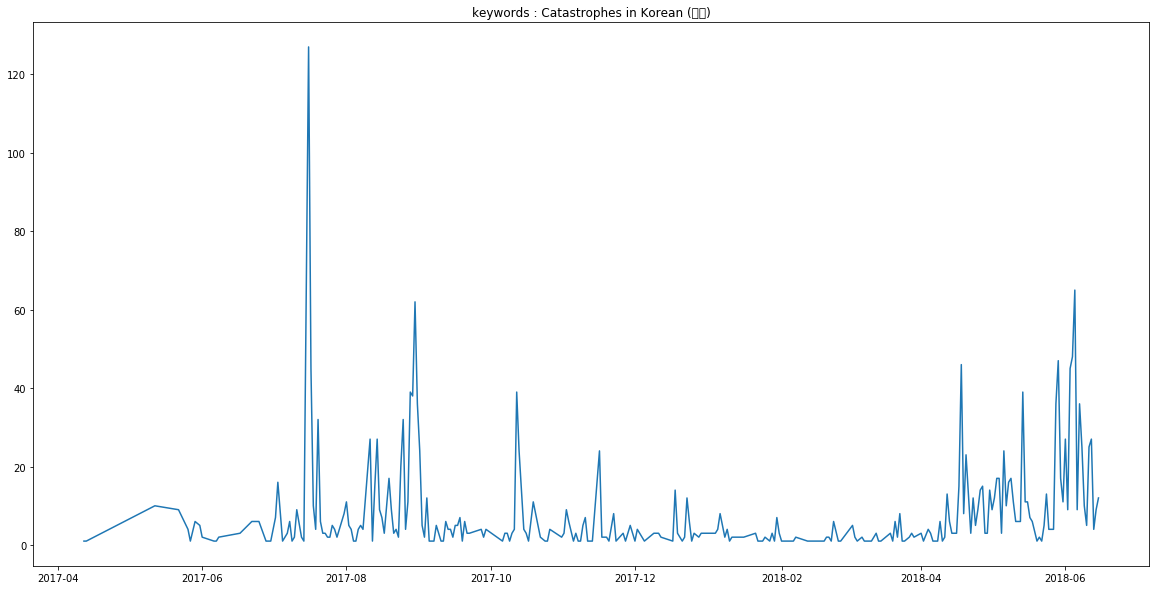

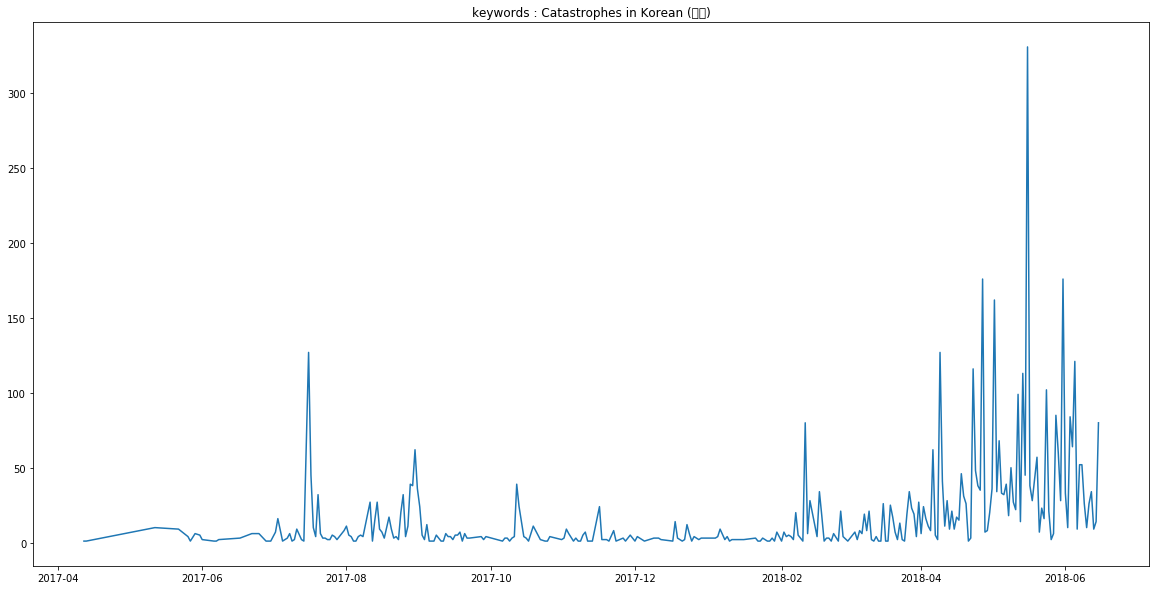

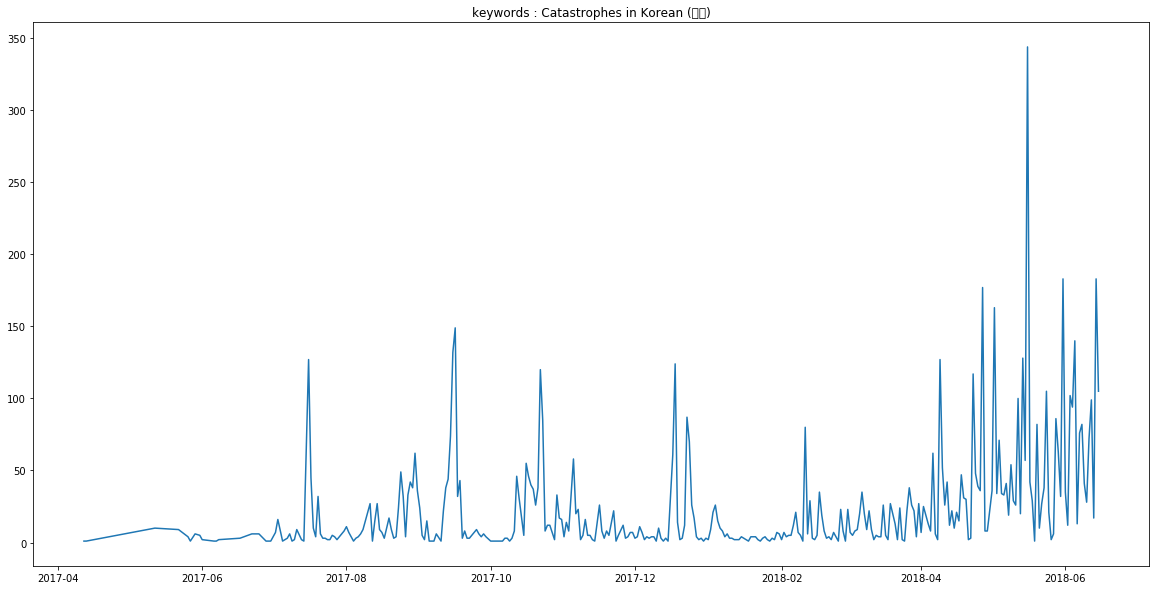

In [123]:
dict_date_ = {}
for keyword in results.distinct('keywords'):
    for i in results.find({'keywords':keyword}):
        date = i['date'][:10]

        if date in dict_date_:
            dict_date_[date] += 1
        else:
            dict_date_[date] = 1

    df = pd.DataFrame(columns=['days', 'count'], index=[k for k in range(len(dict_date_))])
    for z, key in enumerate(dict_date_):
        df['days'][z] = datetime.strptime(key, '%Y-%m-%d') 
        df['count'][z] = dict_date_.get(key)

    df = df.sort_values(by=['days'])

    days = df['days']
    count = df['count']

    plt.figure(figsize=(20,10))
    plt.title('keywords : Catastrophes in Korean (' + keyword + ')')
    line = plt.plot(days, count)
        
        